<a href="https://colab.research.google.com/github/antonitsin/R_code/blob/master/080223_marketing_campaign_impact_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

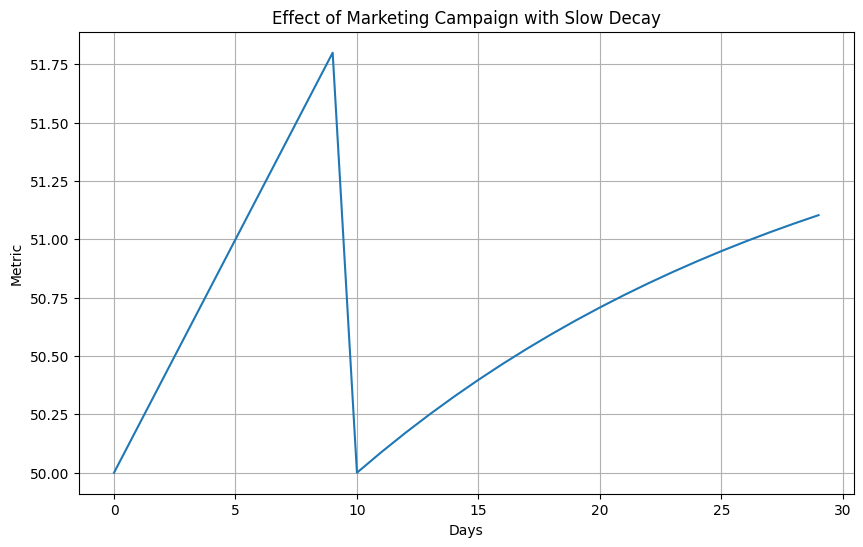

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
campaign_duration = 30  # Duration of the marketing campaign in days
increase_duration = 10  # Duration of the gradual increase phase
decrease_duration = 10  # Duration of the gradual decrease phase
amplitude = 2         # Amplitude of the metric change
baseline_metric = 50    # Baseline metric value
decay_rate = 0.05       # Rate of decay after the increase phase

# Generate time points
time = np.arange(0, campaign_duration)

# Calculate the metric using a sine function for the increase phase
metric_increase = baseline_metric + amplitude * time[:increase_duration] / increase_duration

# Simulate slow decay after the increase phase
decay_start = increase_duration
metric_decay = metric_increase[-1] + (baseline_metric - metric_increase[-1]) * np.exp(-decay_rate * (time[decay_start:] - decay_start))

# Combine the increase and decay phases
metric = np.concatenate((metric_increase, metric_decay))

# Plot the metric over time
plt.figure(figsize=(10, 6))
plt.plot(time, metric)
plt.xlabel('Days')
plt.ylabel('Metric')
plt.title('Effect of Marketing Campaign with Slow Decay')
plt.grid(True)
plt.show()


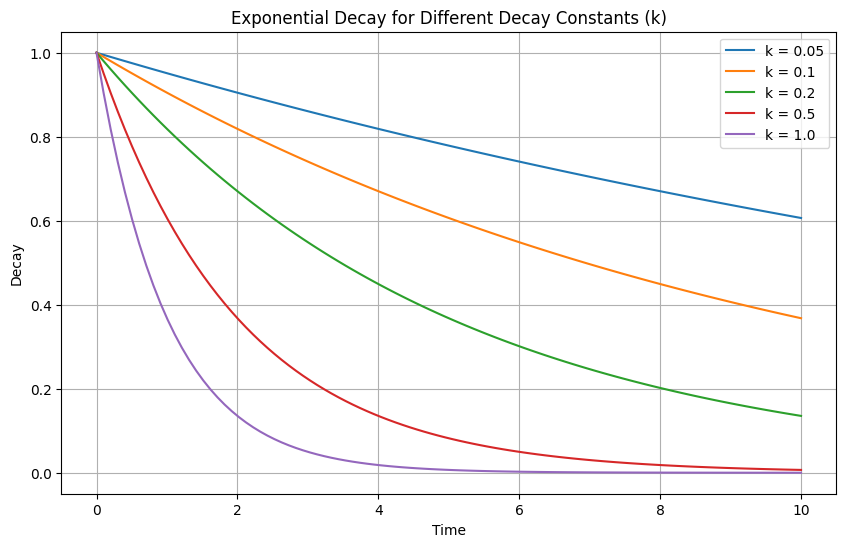

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Time values
time = np.linspace(0, 10, 100)  # Adjust the time range as needed

# Different values of the decay constant (k)
decay_constants = [0.05, 0.1, 0.2, 0.5, 1.0,]

# Plotting
plt.figure(figsize=(10, 6))
for k in decay_constants:
    decay_curve = np.exp(-k * time)
    plt.plot(time, decay_curve, label=f'k = {k}')

plt.xlabel('Time')
plt.ylabel('Decay')
plt.title('Exponential Decay for Different Decay Constants (k)')
plt.legend()
plt.grid(True)
plt.show()


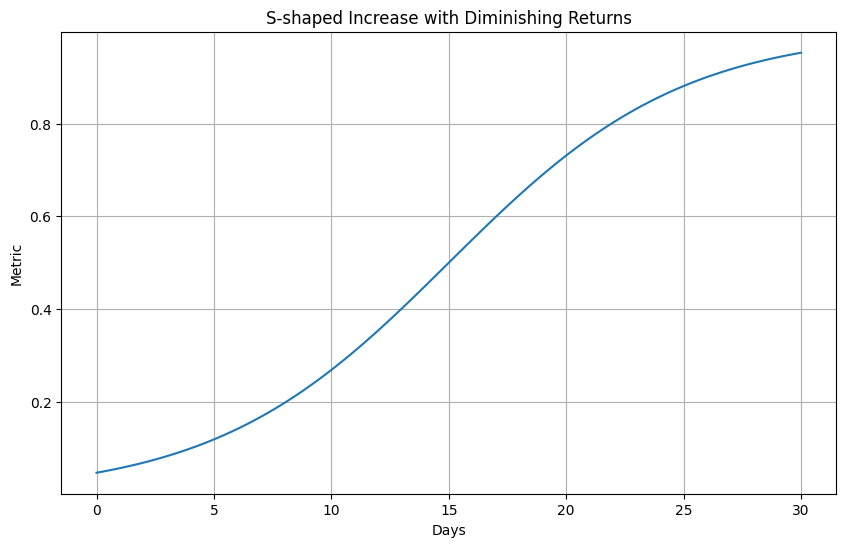

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
growth_rate = 0.2  # Controls the steepness of the S-curve
max_value = 1.0    # Maximum value the curve reaches
campaign_duration = 30  # Duration of the marketing campaign in days

# Generate time points
time = np.linspace(0, campaign_duration, 100)

# Calculate the S-shaped increase with diminishing returns
sigmoid_curve = max_value / (1 + np.exp(-growth_rate * (time - campaign_duration / 2)))

# Plot the S-shaped curve
plt.figure(figsize=(10, 6))
plt.plot(time, sigmoid_curve)
plt.xlabel('Days')
plt.ylabel('Metric')
plt.title('S-shaped Increase with Diminishing Returns')
plt.grid(True)
plt.show()


In [43]:
np.max(sigmoid_curve)

0.9525741268224334

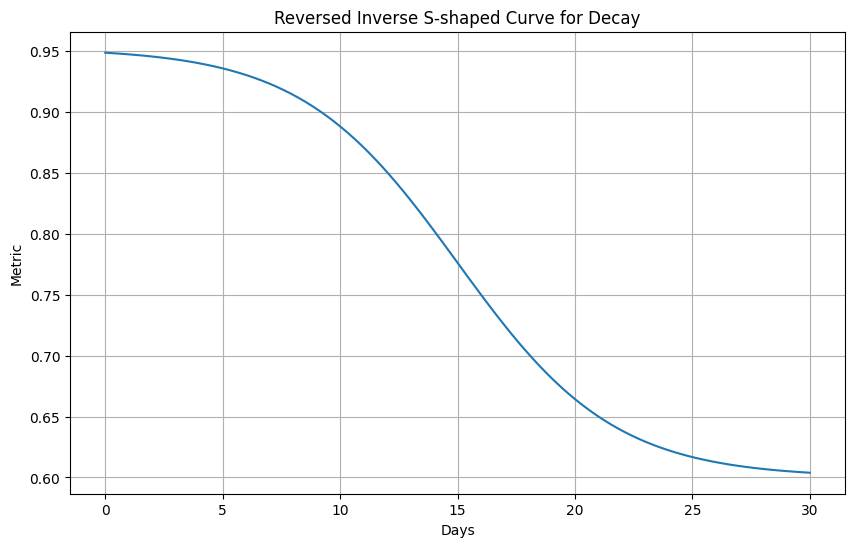

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
decay_rate = 0.3  # Controls the steepness of the inverse S-curve
max_value = np.max(sigmoid_curve)   # Maximum value the curve reaches
min_value = 0.6   # Minimum value the curve ends with
campaign_duration = 30  # Duration of the marketing campaign in days

# Generate time points
time = np.linspace(0, campaign_duration, 100)

# Calculate the reversed inverse S-shaped decay curve
inverse_s_curve = max_value - (max_value - min_value) / (1 + np.exp(-decay_rate * (time - campaign_duration / 2)))

# Plot the reversed inverse S-shaped curve
plt.figure(figsize=(10, 6))
plt.plot(time, inverse_s_curve)
plt.xlabel('Days')
plt.ylabel('Metric')
plt.title('Reversed Inverse S-shaped Curve for Decay')
plt.grid(True)
plt.show()


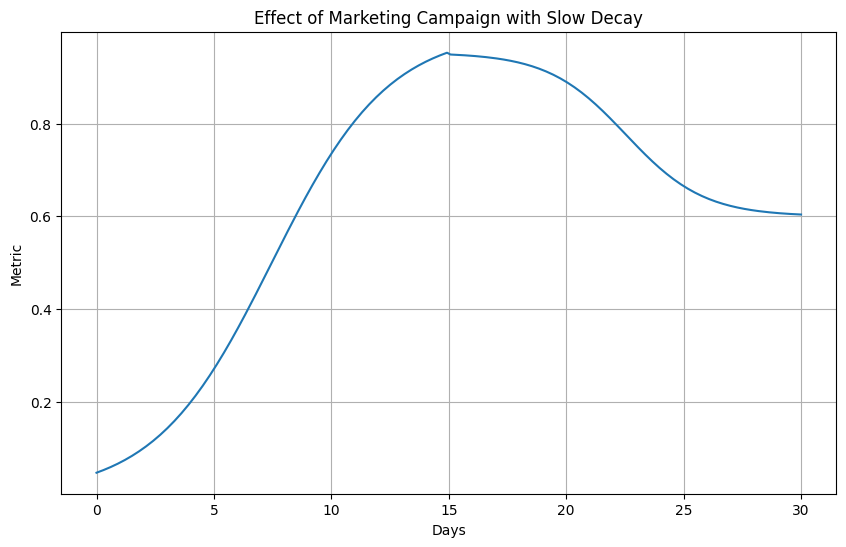

In [45]:
# Combine the increase and decay phases
metric = np.concatenate((sigmoid_curve, inverse_s_curve))
time = np.linspace(0, campaign_duration, 200)
#metric = np.vstack((sigmoid_curve, inverse_s_curve))

# Plot the metric over time
plt.figure(figsize=(10, 6))
plt.plot(time, metric)
plt.xlabel('Days')
plt.ylabel('Metric')
plt.title('Effect of Marketing Campaign with Slow Decay')
plt.grid(True)
plt.show()